In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
path = 'drive/MyDrive/Colab Notebooks/CECS550 Data/Breast Cancer/'

In [ ]:
df = pd.read_csv(path + 'bc.csv', names=["Sample Code Number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",  
                                           "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
                                           "Mitoses", "Class"])
df

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# Change column to int
print(type(df['Bare Nuclei'][0]))

df.replace('?', 0, inplace=True)
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)
print(type(df['Bare Nuclei'][0]))

<class 'str'>
<class 'numpy.int64'>


In [ ]:
# Change 2 for Benign and 4 for Malignant
df['Class'][df['Class'] == 2] = "Benign"
df['Class'][df['Class'] == 4] = "Malignant"
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,Benign
1,1002945,5,4,4,5,7,10,3,2,1,Benign
2,1015425,3,1,1,1,2,2,3,1,1,Benign
3,1016277,6,8,8,1,3,4,3,7,1,Benign
4,1017023,4,1,1,3,2,1,3,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,Benign
695,841769,2,1,1,1,2,1,1,1,1,Benign
696,888820,5,10,10,3,7,3,8,10,2,Malignant
697,897471,4,8,6,4,3,4,10,6,1,Malignant


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",  
            "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
            "Mitoses"]

# Separating out the features
X = df[features].values

# Separating out the target
y = df['Class'].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [ ]:
X

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.34391178]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 9)

principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

principalDf

,0,1,2,3,4,5,6,7,8
0,-1.452777,-0.113166,-0.573705,-0.016001,-0.154882,0.095969,0.312513,0.433717,-0.000717
1,1.464426,-0.543610,0.275535,-0.691483,1.696538,-0.437850,-0.989360,0.354989,0.015165
2,-1.576606,-0.076195,0.036451,-0.111245,-0.064637,-0.260550,0.234960,0.230911,0.017556
3,1.507148,-0.560961,-0.603469,1.444166,-0.423499,-0.125408,-0.260144,-1.596836,0.187885
4,-1.327080,-0.092371,0.026825,-0.315704,-0.159980,0.471365,0.218198,0.433533,-0.033655
...,...,...,...,...,...,...,...,...,...
694,-1.708498,0.186411,-0.075803,0.055589,0.457698,-0.073508,-0.417230,0.097785,0.034497
695,-2.059738,0.232636,0.182533,0.071793,0.137887,0.021064,-0.230487,-0.161810,0.045154
696,3.828442,-0.184227,0.675259,2.508538,-0.276820,-0.261875,0.660486,-0.540286,-0.057580
697,2.271439,-1.115084,0.998460,0.730342,-1.023674,-0.348826,1.673897,-0.094628,0.412819


In [ ]:
finalDf = pd.concat([principalDf, df['Class']], axis = 1)
finalDf

,0,1,2,3,4,5,6,7,8,Class
0,-1.452777,-0.113166,-0.573705,-0.016001,-0.154882,0.095969,0.312513,0.433717,-0.000717,Benign
1,1.464426,-0.543610,0.275535,-0.691483,1.696538,-0.437850,-0.989360,0.354989,0.015165,Benign
2,-1.576606,-0.076195,0.036451,-0.111245,-0.064637,-0.260550,0.234960,0.230911,0.017556,Benign
3,1.507148,-0.560961,-0.603469,1.444166,-0.423499,-0.125408,-0.260144,-1.596836,0.187885,Benign
4,-1.327080,-0.092371,0.026825,-0.315704,-0.159980,0.471365,0.218198,0.433533,-0.033655,Benign
...,...,...,...,...,...,...,...,...,...,...
694,-1.708498,0.186411,-0.075803,0.055589,0.457698,-0.073508,-0.417230,0.097785,0.034497,Benign
695,-2.059738,0.232636,0.182533,0.071793,0.137887,0.021064,-0.230487,-0.161810,0.045154,Benign
696,3.828442,-0.184227,0.675259,2.508538,-0.276820,-0.261875,0.660486,-0.540286,-0.057580,Malignant
697,2.271439,-1.115084,0.998460,0.730342,-1.023674,-0.348826,1.673897,-0.094628,0.412819,Malignant


In [ ]:
pca.explained_variance_ratio_

array([0.6541194 , 0.08601494, 0.05987119, 0.05198205, 0.04231197,
       0.0337962 , 0.03293363, 0.02909156, 0.00987907])

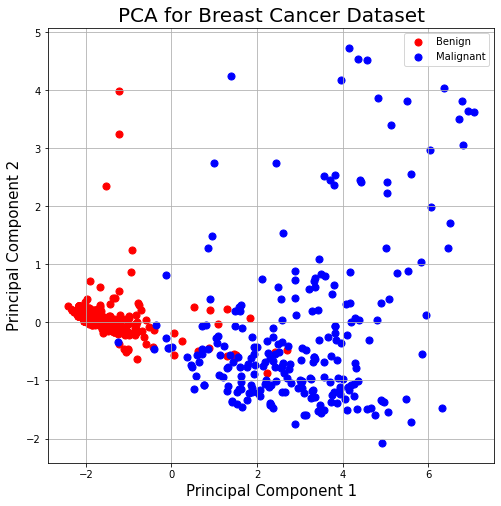

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA for Breast Cancer Dataset', fontsize = 20)
targets = ['Benign','Malignant']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)

In [ ]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)

res = decision_tree.predict(X_test)
score = accuracy_score(res,y_test)

print(score)

0.9428571428571428
